In [491]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [492]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime
import requests
from io import BytesIO

from matplotlib.cm import hsv
import seaborn as sns
import matplotlib.patches as mpatches

# Feature Engineering et Preprocessing



In [493]:
df = pd.read_csv("indexData.csv", parse_dates=True)
df_index = pd.read_csv("indexInfo.csv")

In [494]:
df.head(2)

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0


In [495]:
df.Index.unique()

array(['NYA', 'IXIC', 'HSI', '000001.SS', 'GSPTSE', '399001.SZ', 'NSEI',
       'GDAXI', 'KS11', 'SSMI', 'TWII', 'J203.JO', 'N225', 'N100'],
      dtype=object)

In [496]:
df.isna().sum()

Index           0
Date            0
Open         2204
High         2204
Low          2204
Close        2204
Adj Close    2204
Volume       2204
dtype: int64

In [497]:
df["Mean"] = (df["High"] + df["Low"])/2

Ajout d'une colonne correspondant la moyenne journalière boursière pour chaque bourse

### Ajustement des monnaies

In [498]:
# Taux de change actuel de la monnaie par rapport au dollar américain
usd_eur = 1.1591
usd_hkg = 0.12855619 
usd_chn = 0.15544041
usd_jpn = 0.0087524039 
usd_cnd = 0.80737899 
usd_ind = 0.013287008 
usd_kor = 0.00084286126 
usd_chf = 1.0811685 
usd_tai = 0.035700639 
usd_rsa = 0.068046563 

In [499]:
#Séparation des différentes monnaies boursières, ajout de la colonne du prix normalisé en fonction du dollar américain

hk_se = df.loc[df['Index'] == 'HSI']
hk_se['Normalise_USD'] = hk_se['Close'] * usd_hkg

ny_se = df.loc[df['Index'] == 'NYA']
ny_se['Normalise_USD'] = ny_se['Close'] * 1 
ixic = df.loc[df['Index'] == 'IXIC']
ixic['Normalise_USD'] = ixic['Close'] * 1 

shanghai_se = df.loc[df['Index'] == '000001.SS']
shanghai_se['Normalise_USD'] = shanghai_se['Close'] * usd_chn
shenzhen_se = df.loc[df['Index'] == '399001.SZ']
shenzhen_se['Normalise_USD'] = shenzhen_se['Close'] * usd_chn

tokyo_se = df.loc[df['Index'] == 'N225']
tokyo_se['Normalise_USD'] = tokyo_se['Close'] * usd_jpn

euronext = df.loc[df['Index'] == 'N100']
euronext['Normalise_USD'] = euronext['Close'] * usd_eur

francfort_se = df.loc[df['Index'] == 'GDAXI']
francfort_se['Normalise_USD'] = francfort_se['Close'] * usd_eur

toronto_se = df.loc[df['Index'] == 'GSPTSE']
toronto_se['Normalise_USD'] = toronto_se['Close'] * usd_cnd

india_se = df.loc[df['Index'] == 'NSEI']
india_se['Normalise_USD'] = india_se['Close'] * usd_ind

korea_se = df.loc[df['Index'] == 'ks11']
korea_se['Normalise_USD'] = korea_se['Close'] * usd_kor

six_swiss_se = df.loc[df['Index'] == 'SSMI']
six_swiss_se['Normalise_USD'] = six_swiss_se['Close'] * usd_chf

taiwan_se = df.loc[df['Index'] == 'TWII']
taiwan_se['Normalise_USD'] = taiwan_se['Close'] * usd_tai

rsa_se = df.loc[df['Index'] == 'J203.JO']
rsa_se['Normalise_USD'] = rsa_se['Close'] * usd_rsa

<ipython-input-499-303e956d7847>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hk_se['Normalise_USD'] = hk_se['Close'] * usd_hkg
<ipython-input-499-303e956d7847>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny_se['Normalise_USD'] = ny_se['Close'] * 1
<ipython-input-499-303e956d7847>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [500]:
#Fusion des dataframes
frames = [hk_se, ny_se, ixic, shanghai_se, shenzhen_se, tokyo_se, euronext, francfort_se, toronto_se, india_se, six_swiss_se, taiwan_se, rsa_se]
df = pd.concat(frames)

### Merge de 2 dataset contenant des données complémentaires

In [501]:
results = pd.merge(df, df_index, on="Index")

In [502]:
results['Date'] = pd.to_datetime(results['Date'])
results['Index'] = results['Index'].astype('category')
results['Region'] = results['Region'].astype('category')
results['Exchange'] = results['Exchange'].astype('category')
results['Currency'] = results['Currency'].astype('category')

In [503]:
np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')

True

In [504]:
print(results.dtypes)

Index                  category
Date             datetime64[ns]
Open                    float64
High                    float64
Low                     float64
Close                   float64
Adj Close               float64
Volume                  float64
Mean                    float64
Normalise_USD           float64
Region                 category
Exchange               category
Currency               category
dtype: object


In [505]:
results['Exchange'].unique()

['Hong Kong Stock Exchange', 'New York Stock Exchange', 'NASDAQ', 'Shanghai Stock Exchange', 'Shenzhen Stock Exchange', ..., 'Toronto Stock Exchange', 'National Stock Exchange of India', 'SIX Swiss Exchange', 'Taiwan Stock Exchange', 'Johannesburg Stock Exchange']
Length: 13
Categories (13, object): ['Euronext', 'Frankfurt Stock Exchange', 'Hong Kong Stock Exchange', 'Johannesburg Stock Exchange', ..., 'Shenzhen Stock Exchange', 'Taiwan Stock Exchange', 'Tokyo Stock Exchange', 'Toronto Stock Exchange']

In [506]:
results.describe()

,Open,High,Low,Close,Adj Close,Volume,Mean,Normalise_USD
count,104224.000000,104224.000000,104224.000000,104224.000000,104224.000000,1.042240e+05,104224.000000,104224.000000
mean,8015.353334,8063.324234,7962.581120,8014.366642,8014.161269,1.347646e+09,8012.952677,2972.943113
std,9140.563404,9196.575802,9082.767802,9140.609758,9140.720456,4.427662e+09,9139.509758,3651.088298
min,54.869999,54.869999,54.869999,54.869999,54.869999,0.000000e+00,54.869999,8.931741
25%,2046.887756,2057.213990,2037.185943,2047.506470,2047.358490,0.000000e+00,2047.554978,294.985551
50%,5772.140137,5812.764892,5725.199951,5773.710205,5773.710205,9.529000e+05,5771.112549,1340.347668
75%,10487.377445,10552.179690,10416.092287,10488.622560,10488.622560,2.064676e+08,10486.621336,4291.445190
max,68775.062500,69403.750000,68516.992190,68775.062500,68775.062500,9.440374e+10,68815.226565,17989.209363


In [507]:
stocks = pd.unique(results['Index'])
stock_dfs = []
for stock in stocks:
    stock_dfs.append(results[results['Index'] == stock])
stock_dfs[0]

,Index,Date,Open,High,Low,Close,Adj Close,Volume,Mean,Normalise_USD,Region,Exchange,Currency
0,HSI,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.000000e+00,2568.300049,330.170869,Hong Kong,Hong Kong Stock Exchange,HKD
1,HSI,1987-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hong Kong,Hong Kong Stock Exchange,HKD
2,HSI,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.000000e+00,2540.100098,326.545591,Hong Kong,Hong Kong Stock Exchange,HKD
3,HSI,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.000000e+00,2552.399902,328.126807,Hong Kong,Hong Kong Stock Exchange,HKD
4,HSI,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.000000e+00,2583.899902,332.176327,Hong Kong,Hong Kong Stock Exchange,HKD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8745,HSI,2021-05-25,28461.500000,28929.240230,28461.500000,28910.859380,28910.859380,2.352078e+09,28695.370115,3716.669932,Hong Kong,Hong Kong Stock Exchange,HKD
8746,HSI,2021-05-26,29056.279300,29261.859380,29027.949220,29166.009770,29166.009770,2.518538e+09,29144.904300,3749.471094,Hong Kong,Hong Kong Stock Exchange,HKD
8747,HSI,2021-05-27,28998.390630,29157.949220,28950.720700,29113.199220,29113.199220,3.804955e+09,29054.334960,3742.681970,Hong Kong,Hong Kong Stock Exchange,HKD
8748,HSI,2021-05-28,29219.460940,29336.130860,29033.720700,29124.410160,29124.410160,2.591560e+09,29184.925780,3744.123206,Hong Kong,Hong Kong Stock Exchange,HKD


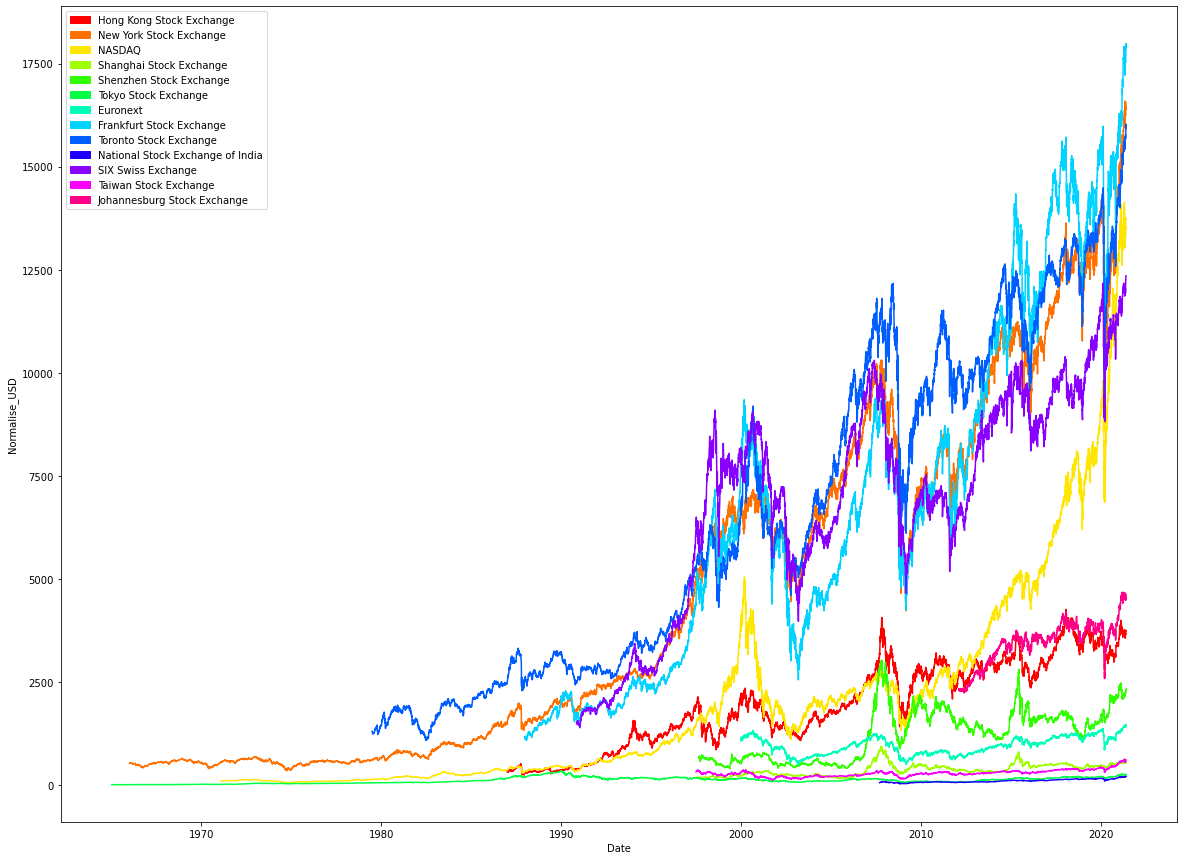

In [508]:
#Graphique des derniers prix correspondant aux différentes Bourses mondiales en fonction du temps
fig, ax = plt.subplots(figsize=(20, 15))
patches = []
for i, stock_df in enumerate(stock_dfs):
    #couleur classées en fonction
    color = (hsv(i/len(stock_dfs)))
    sns.lineplot(ax=ax, x=stock_df['Date'], y=stock_df['Normalise_USD'], color=color)
    #adaptation couleurs aux Bourses
    patches.append(mpatches.Patch(color=color, label=stock_df['Exchange'].iloc[0]))
ax.legend(handles=patches)

In [509]:
from statsmodels.tsa.arima.model import ARIMA 
from pmdarima.arima import auto_arima, ADFTest
from statsmodels.tsa.seasonal import STL, seasonal_decompose

In [510]:
results.head(2)

,Index,Date,Open,High,Low,Close,Adj Close,Volume,Mean,Normalise_USD,Region,Exchange,Currency
0,HSI,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,2568.300049,330.170869,Hong Kong,Hong Kong Stock Exchange,HKD
1,HSI,1987-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hong Kong,Hong Kong Stock Exchange,HKD


In [511]:
#Création d'une col moy basée sur la variation les + extrêmes des 24h
results["Mean"] = (results["Low"] + results["High"])/2

In [512]:
#Création d'une colonne 'Current' --> prédiction sur la journée basée sur les 2 derniers j (steps = -1)
steps=-1
df_predict= results.copy()
df_predict["Actual"]=df_predict["Mean"].shift(steps)

In [513]:
df_predict = df_predict.dropna()

### Normalisation

In [514]:
from sklearn.preprocessing import MinMaxScaler

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [515]:
sc = MinMaxScaler(feature_range=(0, 1))

In [516]:
df_hg = df_predict[df_predict["Region"] == "Hong Kong"]

In [517]:
#df_hg = df_hg.set_index("Date")

In [518]:
df_close = df_hg["Close"]
df_close = pd.DataFrame({'date':df_close.index, 'Close':df_close.values})
df_close = df_close.set_index("date")

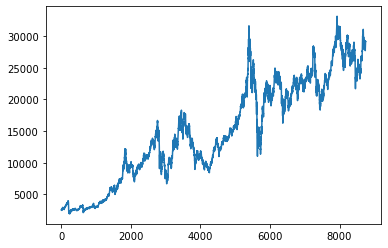

In [519]:
plt.plot(df_close)

In [520]:
df_hg

,Index,Date,Open,High,Low,Close,Adj Close,Volume,Mean,Normalise_USD,Region,Exchange,Currency,Actual
2,HSI,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.000000e+00,2540.100098,326.545591,Hong Kong,Hong Kong Stock Exchange,HKD,2552.399902
3,HSI,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.000000e+00,2552.399902,328.126807,Hong Kong,Hong Kong Stock Exchange,HKD,2583.899902
4,HSI,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.000000e+00,2583.899902,332.176327,Hong Kong,Hong Kong Stock Exchange,HKD,2607.100098
5,HSI,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.000000e+00,2607.100098,335.158856,Hong Kong,Hong Kong Stock Exchange,HKD,2603.300049
6,HSI,1987-01-08,2603.300049,2603.300049,2603.300049,2603.300049,2603.300049,0.000000e+00,2603.300049,334.670336,Hong Kong,Hong Kong Stock Exchange,HKD,2561.699951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8745,HSI,2021-05-25,28461.500000,28929.240230,28461.500000,28910.859380,28910.859380,2.352078e+09,28695.370115,3716.669932,Hong Kong,Hong Kong Stock Exchange,HKD,29144.904300
8746,HSI,2021-05-26,29056.279300,29261.859380,29027.949220,29166.009770,29166.009770,2.518538e+09,29144.904300,3749.471094,Hong Kong,Hong Kong Stock Exchange,HKD,29054.334960
8747,HSI,2021-05-27,28998.390630,29157.949220,28950.720700,29113.199220,29113.199220,3.804955e+09,29054.334960,3742.681970,Hong Kong,Hong Kong Stock Exchange,HKD,29184.925780
8748,HSI,2021-05-28,29219.460940,29336.130860,29033.720700,29124.410160,29124.410160,2.591560e+09,29184.925780,3744.123206,Hong Kong,Hong Kong Stock Exchange,HKD,29067.490235


# Modele

In [521]:
scaled_input = sc.fit_transform(df_hg[["Open", "High","Low", "Close", "Volume", "Adj Close", "Mean"]])
scaled_input =pd.DataFrame(scaled_input)
scaled_input['Date'] =pd.to_datetime(df_hg['Date'])
scaled_input.index = scaled_input['Date']
X = scaled_input
X = X.drop(columns = "Date")

In [522]:
X.rename(columns={0:'Open', 1:'High', 2:'Low', 3:'Close', 4:'Volume', 5:'Adj Close', 6:'Mean'}, inplace=True)
X.head(2)
X

,Open,High,Low,Close,Volume,Adj Close,Mean
Date,,,,,,,
NaT,0.018786,0.018698,0.020811,0.020640,0.000000,0.020640,0.019746
NaT,0.019178,0.019088,0.021208,0.021034,0.000000,0.021034,0.020139
1987-01-02,0.020182,0.020087,0.022224,0.022041,0.000000,0.022041,0.021146
1987-01-05,0.020921,0.020822,0.022973,0.022784,0.000000,0.022784,0.021888
1987-01-06,0.020800,0.020702,0.022850,0.022662,0.000000,0.022662,0.021767
...,...,...,...,...,...,...,...
2019-08-07,0.844703,0.855556,0.856928,0.864256,0.240030,0.864256,0.856236
2019-08-08,0.863654,0.866104,0.875199,0.872418,0.257017,0.872418,0.870613
2019-08-09,0.861810,0.862809,0.872708,0.870729,0.388296,0.870729,0.867716


In [523]:
scaled_output = sc.fit_transform(df_hg[["Actual"]])
scaled_output =pd.DataFrame(scaled_output)
scaled_output['Date'] =pd.to_datetime(df_hg['Date'])
scaled_output.index = scaled_output['Date']
y=scaled_output

In [524]:
y = y.drop(columns = {'Date'})

In [525]:
y.rename(columns={0:'Stock_price_next_day'}, inplace=True)
y.head(2)

,Stock_price_next_day
Date,
NaT,0.061959
NaT,0.062924


In [526]:
train_size=int(len(df_hg) *0.7)
test_size = int(len(df_hg)) - train_size
train_X, train_y = X[:train_size].dropna(), y[:train_size].dropna()
test_X, test_y = X[train_size:].dropna(), y[train_size:].dropna()

In [527]:
def Test_Augmented_Dickey_Fuller(series, title=''):
    dfout={}
    dftest=sm.tsa.adfuller(series.dropna(), autolag='AIC', regression='ct')
    for key,val in dftest[4].items():
        dfout[f'critical value ({key})']=val
    if dftest[1]<=0.05:
        print("Strong evidence against Null Hypothesis")
        print("Reject Null Hypothesis - Data is Stationary")
        print("Data is Stationary", title)
    else:
        print("Strong evidence for  Null Hypothesis")
        print("Accept Null Hypothesis - Data is not Stationary")
        print("Data is NOT Stationary for", title)

In [528]:
y_test=y['Stock_price_next_day'][:train_size].dropna()
Test_Augmented_Dickey_Fuller(y_test, 'Stock Price')

Strong evidence for  Null Hypothesis
Accept Null Hypothesis - Data is not Stationary
Data is NOT Stationary for Stock Price


In [529]:
Test_Augmented_Dickey_Fuller(y_test.diff(), "Stock Price")

Strong evidence against Null Hypothesis
Reject Null Hypothesis - Data is Stationary
Data is Stationary Stock Price


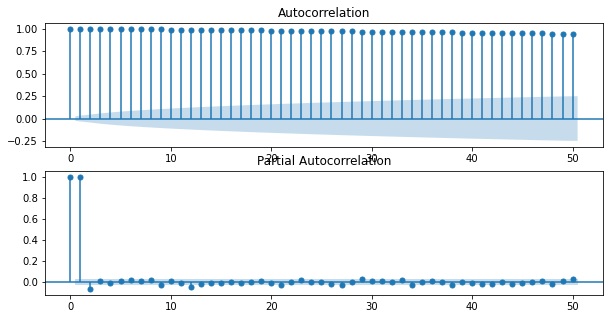

In [530]:
fig,ax= plt.subplots(2,1, figsize=(10,5))
fig=sm.tsa.graphics.plot_acf(y_test, lags=50, ax=ax[0])
fig=sm.tsa.graphics.plot_pacf(y_test, lags=50, ax=ax[1])
plt.show()

In [595]:
from pmdarima.arima import auto_arima
import time

In [596]:
step_wise = auto_arima(train_y, exogenous= train_X, start_p=1, start_q=1,max_p=7, max_q=7,d=1, max_d=7,trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-43744.132, Time=3.63 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-43679.761, Time=2.83 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-43735.051, Time=2.90 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-43728.836, Time=2.93 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-39777.221, Time=6.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-43747.486, Time=3.49 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-43749.348, Time=3.33 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-43748.704, Time=3.62 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-43746.613, Time=3.86 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-43749.944, Time=3.23 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-43735.488, Time=2.66 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-43749.342, Time=3.23 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-43748.303, Time=3.28 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-43744.734, Time=3.25 sec
 ARIM

In [578]:
step_wise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5814
Model:               SARIMAX(2, 1, 0)   Log Likelihood               21884.972
Date:                Sun, 07 Nov 2021   AIC                         -43749.944
Time:                        22:13:25   BIC                         -43683.265
Sample:                             0   HQIC                        -43726.751
                               - 5814                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Open           0.1644      0.013     12.650      0.000       0.139       0.190
High        1.341e+12      0.012   1.13e+14      0.000    1.34e+12    1.34e+12
Low         1.318e+12      0.012   1.12e+14      0.000    1.32e+12    1.32e+12
Close      -5.011e+07      0.006  -8.55e+09      0.000   -5.01e+07   -5.01e+07
Volume         0.0103      0.001      9.731      0.000       0.008       0.012
Adj Close   5.011e+07      0.006   8.55e+09      0.000    5.01e+07    5.01e+07
Mean       -2.659e+12      0.007  -3.73e+14      0.000   -2.66e+12   -2.66e+12
ar.L1         -0.0933      0.015     -6.221      0.000      -0.123      -0.064
ar.L2          0.0536      0.008      7.136      0.000       0.039       0.068
sigma2      3.143e-05   2.43e-07    129.086      0.000     3.1e-05    3.19e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             33483.64
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):              11.93   Skew:                            -0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.71e+17. Standard errors may be unstable.
"""

In [579]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model= SARIMAX(train_y, 
 exog=train_X, orders=(2,1,0))

/Users/benjaminnahum/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/benjaminnahum/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/Users/benjaminnahum/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/benjaminnahum/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueW

In [580]:
results= model.fit()

/Users/benjaminnahum/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [581]:
predictions= results.predict(start =train_size,end=train_size+test_size+(steps),exog=test_X)

/Users/benjaminnahum/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [582]:
forecast_1= results.forecast(steps=test_size, exog=test_X)

/Users/benjaminnahum/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [583]:
act= pd.DataFrame(scaled_output.iloc[train_size:, 0])

In [584]:
act.rename(columns={0:'Stock_price_next_day'}, inplace=True)

In [585]:
predictions=pd.DataFrame(predictions)
predictions.reset_index(drop=True, inplace=True)
predictions.index=test_X.index
predictions['Actual'] = act["Stock_price_next_day"]
predictions = predictions.rename(columns={"predicted_mean": "Pred_SARIMAX"})

In [601]:
predictions = predictions.iloc[:-1]
predictions

,Pred_SARIMAX,Actual
Date,,
2009-07-14,0.682575,0.698500
2009-07-15,0.692431,0.704356
2009-07-16,0.692082,0.707923
2009-07-17,0.700448,0.719861
2009-07-20,0.701493,0.725119
...,...,...
2019-08-05,0.729830,0.850878
2019-08-06,0.727668,0.862372
2019-08-07,0.740158,0.876135


<AxesSubplot:xlabel='Date'>

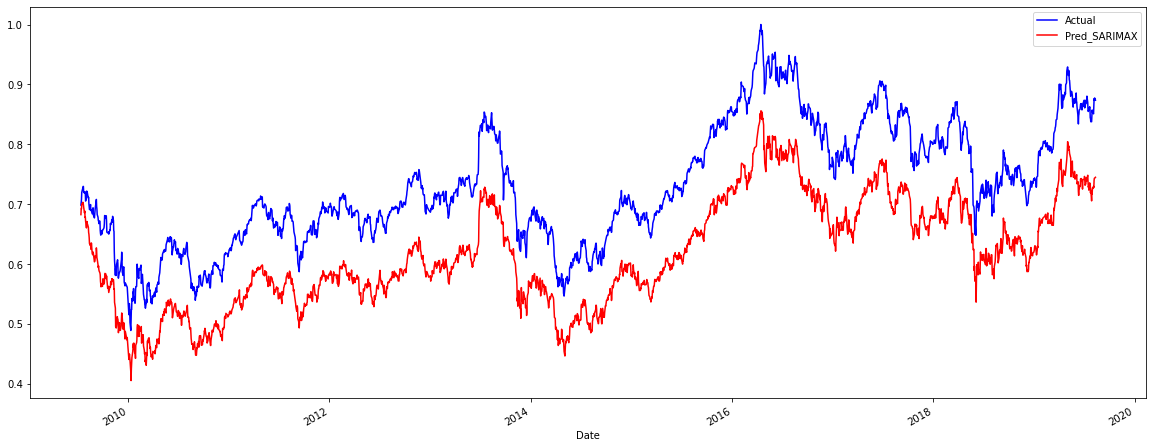

In [588]:
predictions["Actual"].plot(figsize=(20,8), legend=True, color="blue")
predictions["Pred_SARIMAX"].plot(legend=True, color="red", figsize=(20,8))

In [589]:
forecast= pd.DataFrame(forecast_1)
forecast.reset_index(drop=True, inplace=True)
forecast.index=test_X.index
forecast["Actual"] =scaled_output.iloc[train_size:, 0]
forecast = forecast.rename(columns={"predicted_mean": "Forecast"})

In [590]:
forecast = forecast.iloc[:-1]

<AxesSubplot:xlabel='Date'>

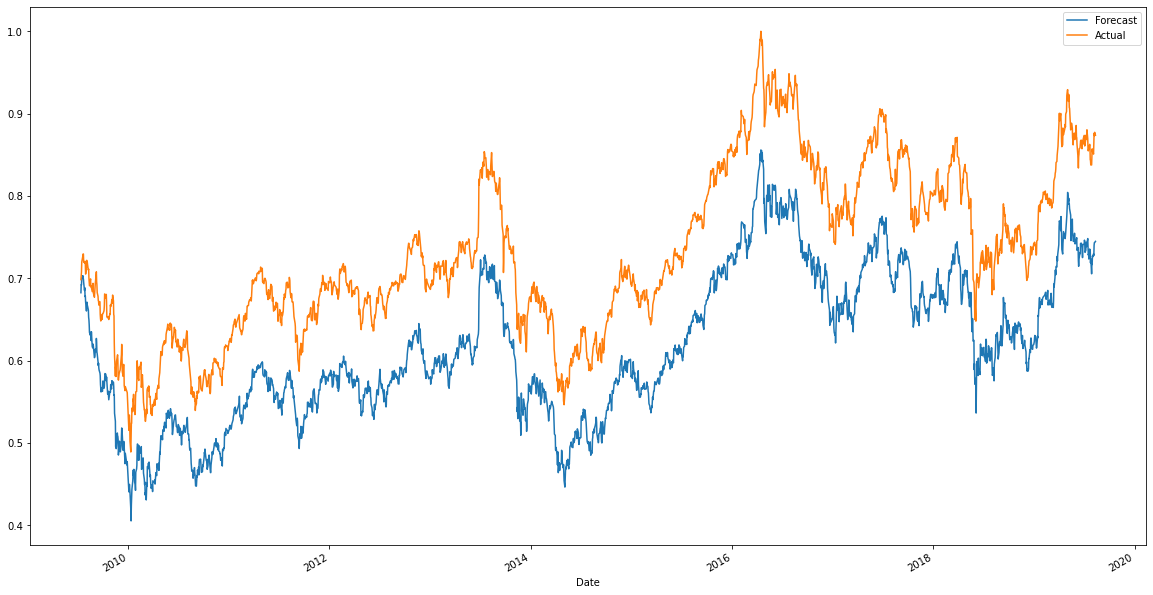

In [591]:
plt.figure(figsize = (20,11))
forecast["Forecast"].plot(legend=True)
forecast["Actual"].plot(legend=True)

### Calcul de la RMSE

In [593]:
from statsmodels.tools.eval_measures import rmse
error=rmse(predictions['Pred_SARIMAX'], predictions['Actual'])
error

0.11385790036587945